<a href="https://colab.research.google.com/github/aliansgp/Learning-PyTorch/blob/main/CodeMe-com/04_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# create a model for train with iris dataset
https://archive.ics.uci.edu/dataset/53/iris

this dataset has 4 parameters and classify 3 types of iris flower

flower parameters:
1.   sepal length
2.   sepal width
3.   petal length
4.   petal width

iris types:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica



* goal is create a basic two layer nn model


In [36]:
# create Model class that inherits nn
class Model(nn.Module):
  # in_features -> number of inputs into input layer
  # out_features -> number of outputs out of output layer
  # h1 and h2 are our two hidden layers and number is neurons count in layer
  def __init__(self, in_features = 4,h1 = 8 ,h2 = 9, out_features = 3):
    super().__init__()
    # structure is like this:
    """
    input layer(4 feature of flower)-->
    hidden layer 1 (number of neurons)-->
    h2 (n) -->
    output layer (3 class of flower)
    """
    # fc is fully connected (type of layer connection)
    self.fc1 = nn.Linear(in_features , h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  # function for move data forward in nn
  def Forward(self,x):
    # with this function, we pass data throw out layers until out layer

    # relu : It replaces all the negative elements in the input tensor with 0 (zero),
    #              and all the non-negative elements are left unchanged.
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [37]:
#set training random seed.
torch.manual_seed(41)

model = Model()


# Load data and train the Model

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# import all data in one csv from github
# https://gist.github.com/netj/8836201 as raw file
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)


In [40]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [41]:
# change variety column into numbers
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Virginica',1.0)
df['variety'] = df['variety'].replace('Versicolor',2.0)

In [42]:
# train test split:
x = df.drop('variety',axis=1)
y = df['variety']

In [43]:
# convert x and y into np array
x = x.values
y = y.values

In [44]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
# use sk-learn model selection tool to select train and test data randomly:
from sklearn.model_selection import train_test_split
# use 0.2 data as test and random_state, 41
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [46]:
# convert x arrays into float tensors (float because our data is float)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# convert y arrays into tensor long (its because we only care its 0 or 1 or 2 not 1.0 or 2.0)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [47]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
# Train our model!
# Epochs--> (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.Forward(x_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1397501230239868
Epoch: 10 and loss: 1.0544781684875488
Epoch: 20 and loss: 0.9169963002204895
Epoch: 30 and loss: 0.626531720161438
Epoch: 40 and loss: 0.398959755897522
Epoch: 50 and loss: 0.24899594485759735
Epoch: 60 and loss: 0.13557125627994537
Epoch: 70 and loss: 0.0753169059753418
Epoch: 80 and loss: 0.05017305538058281
Epoch: 90 and loss: 0.038725774735212326


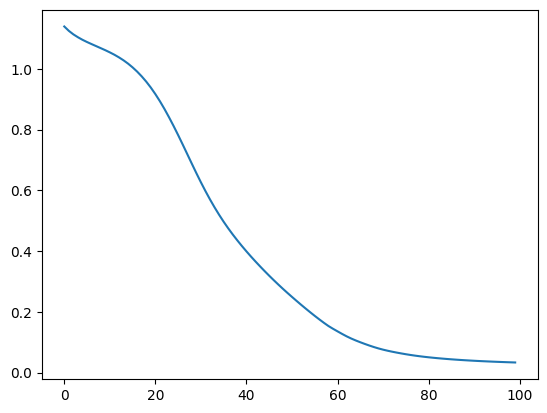

In [49]:
plt.plot(losses)


# Evaluate

In [51]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.Forward(x_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [53]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.Forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-6.9784,  5.7408,  2.8402]) 	 1 	 1
2.)  tensor([-10.1071,   9.1282,   1.2868]) 	 1 	 1
3.)  tensor([-10.9573,   9.6341,   2.1394]) 	 1 	 1
4.)  tensor([-2.8619,  1.0350,  5.6483]) 	 2 	 2
5.)  tensor([-8.7825,  7.4768,  2.6113]) 	 1 	 1
6.)  tensor([-0.5755, -1.5204,  7.0309]) 	 2 	 2
7.)  tensor([-6.4483,  4.9982,  3.6193]) 	 1 	 1
8.)  tensor([-2.5482,  0.6935,  5.8083]) 	 2 	 2
9.)  tensor([-7.5285,  6.1544,  3.1245]) 	 1 	 1
10.)  tensor([-10.7089,   9.6708,   1.3234]) 	 1 	 1
11.)  tensor([-5.9014,  4.4571,  3.7348]) 	 1 	 1
12.)  tensor([ 13.1980, -14.0947,   5.5082]) 	 0 	 0
13.)  tensor([ 12.0202, -12.7830,   4.8827]) 	 0 	 0
14.)  tensor([ 1.2342, -3.0498,  6.4268]) 	 2 	 2
15.)  tensor([ 11.4912, -12.5932,   5.9296]) 	 0 	 0
16.)  tensor([-5.4750,  3.9454,  4.1031]) 	 1 	 2
17.)  tensor([ 11.9543, -12.8597,   5.3534]) 	 0 	 0
18.)  tensor([-6.5486,  5.2590,  3.1050]) 	 2 	 1
19.)  tensor([ 13.8702, -14.6057,   5.0760]) 	 0 	 0
20.)  tensor([ 10.5790, -11.5632,  

In [54]:
loss


tensor(0.1286)

In [55]:
# so the loss is not good
# changing seed may fix this

## predict a new data from iris flower with our model

In [57]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model.Forward(new_iris))

tensor([ 12.8107, -13.6070,   5.1117])


# save/load the trained model

In [60]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [61]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [62]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)